In [25]:
#Knn ha bisogno di valori scaled, normalizzati.

In [1]:
### importare pandas, seaborn e matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


I dati sono nella cartella in formato .csv, sotto il nome 'cars.csv'. Caricare il csv in DataFrame Pandas. NB. il dataset originale è disponibile qui: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [6]:
### importare i dati con pd.read_csv()
df = pd.read_csv('ilaria ruscillo - cars.csv')

### TRAIN/TEST SPLIT

In [3]:
# importare train_test_split da sklearn.model_selection
from sklearn.model_selection import train_test_split

In [7]:
# Dividere il dataset in train/test set, utilizzando una test_size=0.25, shuffle=True, random_state=22
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

### FEATURES & TARGET

In [8]:
### creare X_train e X_test selezionando solo le features 'km_driven','mileage','max_power','seats'
features = ['km_driven','mileage','max_power','seats']

X_train = train_df[features].copy()
X_test = test_df[features].copy()

In [9]:
### creare y_train e y_test, il nome del target è 'selling_price'
y_train = train_df['selling_price'].copy()
y_test = test_df['selling_price'].copy()

### STANDARDIZATION

In [24]:
### importare StandardScaler da sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    #devi chiamarla con le parentesi per inizializzare la funzione

In [12]:
### eseguire .fit_transform sulle feature del train set
X_train_scaled = scaler.fit_transform(X_train)


In [13]:
### usare lo scaler fittato per fare .transform sulle feature del test set
X_test_scaled = scaler.transform(X_test)

### FITTING

In [15]:
### importare KNearestNeighbors da sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

In [28]:
### eseguire il fitting del modello sul train_df_scaled, usando la funzione .fit()
model = KNeighborsRegressor()           
model = model.fit(X_train_scaled, y_train)      #il fitting si fa sul train, non sul test

### PREDICTION

In [18]:
### fare previsioni sia sul train_df_scaled che sul test_df_scaled usando la funzione .predict()
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

### EVALUATION

In [19]:
### importare mean_absolute_error e r2_score da sklearn.metrics
from sklearn.metrics import mean_absolute_error, r2_score

TRAIN SET
MAE:  95590.26550851745
R2:  0.9423445632004421


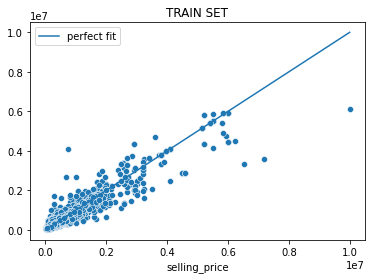

TEST SET
MAE:  116455.68042488619
R2:  0.8953150635381143


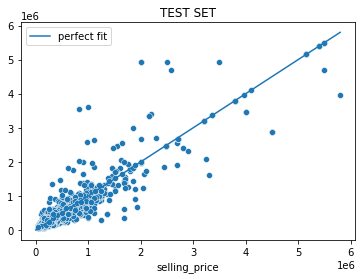

In [21]:
### calcolare MAE e R2 del modello sia sul train_set che sul test_set, e poi printarli
def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:                 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')


In [ ]:
#c'è overfittin quando il train performa meglio del test, cioè quando l'r2 è maggiore.
#se io mi calcolassi direttamente questa differenza otterrei il valore dell'overfitting

TRAIN SET
MAPE:  0.6597846503840978
R2:  0.5449288885716987


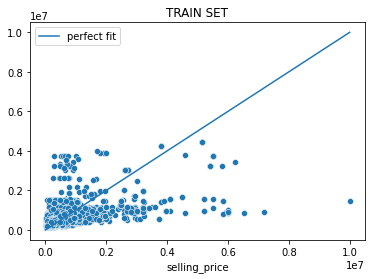

TEST SET
MAPE:  0.6312610492892674
R2:  0.6246449637016203


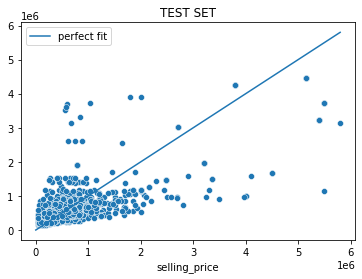

In [33]:
def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_percentage_error, r2_score
    
    mape = mean_absolute_percentage_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:                 
        print(title)
        print('MAPE: ', mape)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mapee':mape, 'r2':r2}

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')


In [ ]:
#il MAPE ritorna le percentuali.

### TUNING

In [30]:
### Provare a trovare un buon valore di n_neighbors

train_r2_list = list()
test_r2_list = list()

k_list = range(1, 50)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    over = train_metrics['r2'] - test_metrics['r2']
    print('La differenza è:', over)
     
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]
    


K: 1
TRAIN SET
MAE:  19596.938269522685
R2:  0.9949926258673502
TEST SET
MAE:  144297.92817400102
R2:  0.8781351246822883
La differenza è: 0.11685750118506188

K: 2
TRAIN SET
MAE:  86061.4121268342
R2:  0.9535104262470714
TEST SET
MAE:  147116.2124430956
R2:  0.8786864568444854
La differenza è: 0.07482396940258595

K: 3
TRAIN SET
MAE:  115923.33114072075
R2:  0.918193738509086
TEST SET
MAE:  152024.43146181083
R2:  0.8698554748577397
La differenza è: 0.0483382636513463

K: 4
TRAIN SET
MAE:  133582.9747849553
R2:  0.8866706353946758
TEST SET
MAE:  161424.9859635812
R2:  0.8503581948778455
La differenza è: 0.03631244051683036

K: 5
TRAIN SET
MAE:  146831.9785798617
R2:  0.8590255026292705
TEST SET
MAE:  168403.9085483055
R2:  0.8295588880422073
La differenza è: 0.029466614587063122

K: 6
TRAIN SET
MAE:  156233.52740765727
R2:  0.8394553918386609
TEST SET
MAE:  171863.07502950597
R2:  0.8244490944408855
La differenza è: 0.01500629739777537

K: 7
TRAIN SET
MAE:  164659.62561742528
R2:  0.

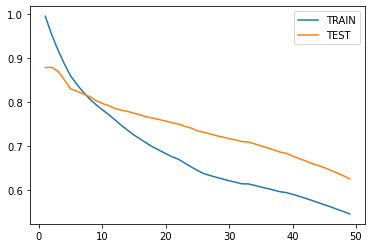

In [27]:
plt.plot(k_list, train_r2_list, label='TRAIN')
plt.plot(k_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

In [31]:
#ilk migliore è al punto di incrocio che è anche ragionevolmente alto
#dovrebbe essere k=7

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled)



In [39]:
casa = X_train_scaled.iloc[0:1]

In [40]:
casa

,0,1,2,3
0,-0.748959,0.358297,-0.241413,-0.437562


In [41]:
model.predict(casa)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([1401428.57142857])